**Imports**

In [2]:
# BASE
import pandas as pd
import numpy as np
import sklearn
from sklearn import set_config
import pickle

#VISUALIZATION
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.tree import plot_tree


#??????????????????????? WHAT ARE YOU????????????????????????
from scipy.stats import mode                                                        #?????????????????????????????????
from sklearn.datasets import load_digits                                            #?????????????????????????????
from sklearn.decomposition import PCA                                               #??????????????????????????
from sklearn.manifold import TSNE                                                   #????????????????????????????
from sklearn.datasets import make_classification                                    #??????????????????????????
from scipy.special import expit                                                     #???????????????????????????


#VOTING
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier


#CLASIFIERS
from sklearn.tree import DecisionTreeClassifier                                     
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV                # search of the best params for random_forrest
from sklearn.linear_model import SGDClassifier                                      #????????????????????????
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors                                      #????????????????????????
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC                                                         #???????????
from sklearn.ensemble import AdaBoostClassifier                                     #?????????????




#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor





#CLASTERING
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch                                               #????????????????????????????




# SCALERS and TRANSFORMATION
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer

from sklearn.pipeline import Pipeline                                               # pipeline function for transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer




# metrics and processing 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import train_test_split
from scipy.stats import zscore, boxcox
from sklearn.model_selection import cross_val_score                                 #??????????????????????????



# EDA data treatment
import missingno


# other (mainly system libs)
import warnings
import sys
from io import StringIO
import time
import os
import shutil
from dotenv import load_dotenv
from sqlalchemy import create_engine
import itertools
from collections import Counter
import urllib.request as req
import zipfile

**Constants:**

In [3]:
SEED = 50
URL = 'https://www.kaggle.com/api/v1/datasets/download/ulrikthygepedersen/kickstarter-projects'


**Downloading the data form https://www.kaggle.com/api/v1/datasets/download/ulrikthygepedersen/kickstarter-projects and unzipping it.**

In [4]:
req.urlretrieve(URL, '/data/data.zip')
zipfile.ZipFile('/data/data.zip', 'a').extractall(path='./data/')

**Some EDA...**

In [5]:
df = pd.read_csv('./data/kickstarter_projects.csv')
#missingno.matrix(df)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB
None
                 ID          Goal       Pledged        Backers
count  3.748530e+05  3.748530e+05  3.748530e+05  374853.000000
mean   1.074656e+09  4.586378e+04  9.121073e+03     106.690359
std    6.191377e+08  1.158778e+06  9.132054e+04     911.718520
min    5.971000e+03  0.000000e+00  

**Split and saving the files:**

In [6]:
df.columns = [val.strip().replace(' ','_').lower() for val in df.columns.tolist()]
df.drop('id', axis=1, inplace=True)
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d')
df = df[(df['state'] == 'Successful') | (df['state'] == 'Failed')]

df['state'] = df['state'].map({'Successful':1 , 'Failed': 0})




X_train, X_test, y_train, y_test = train_test_split(df.drop('state', axis=1), df['state'], train_size=0.7, stratify=df['state'], random_state=SEED)
X_train.to_csv('./data/X_train.csv',index=False)
X_test.to_csv('./data/X_test.csv',index=False)
y_train.to_csv('./data/y_train.csv',index=False)
y_test.to_csv('./data/y_test.csv',index=False)

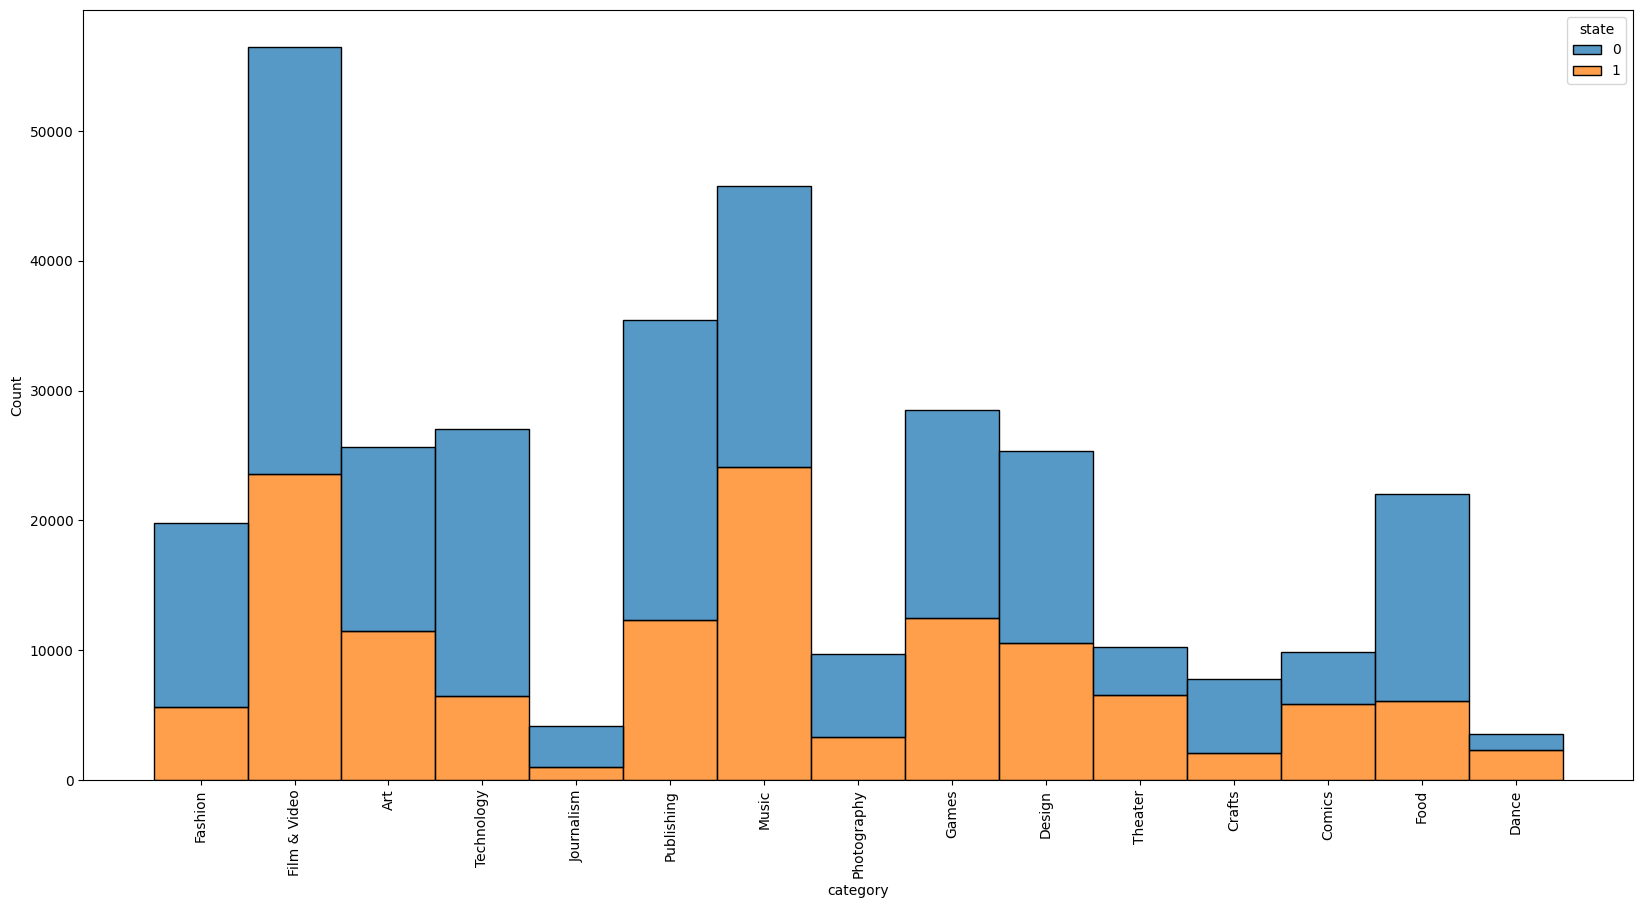

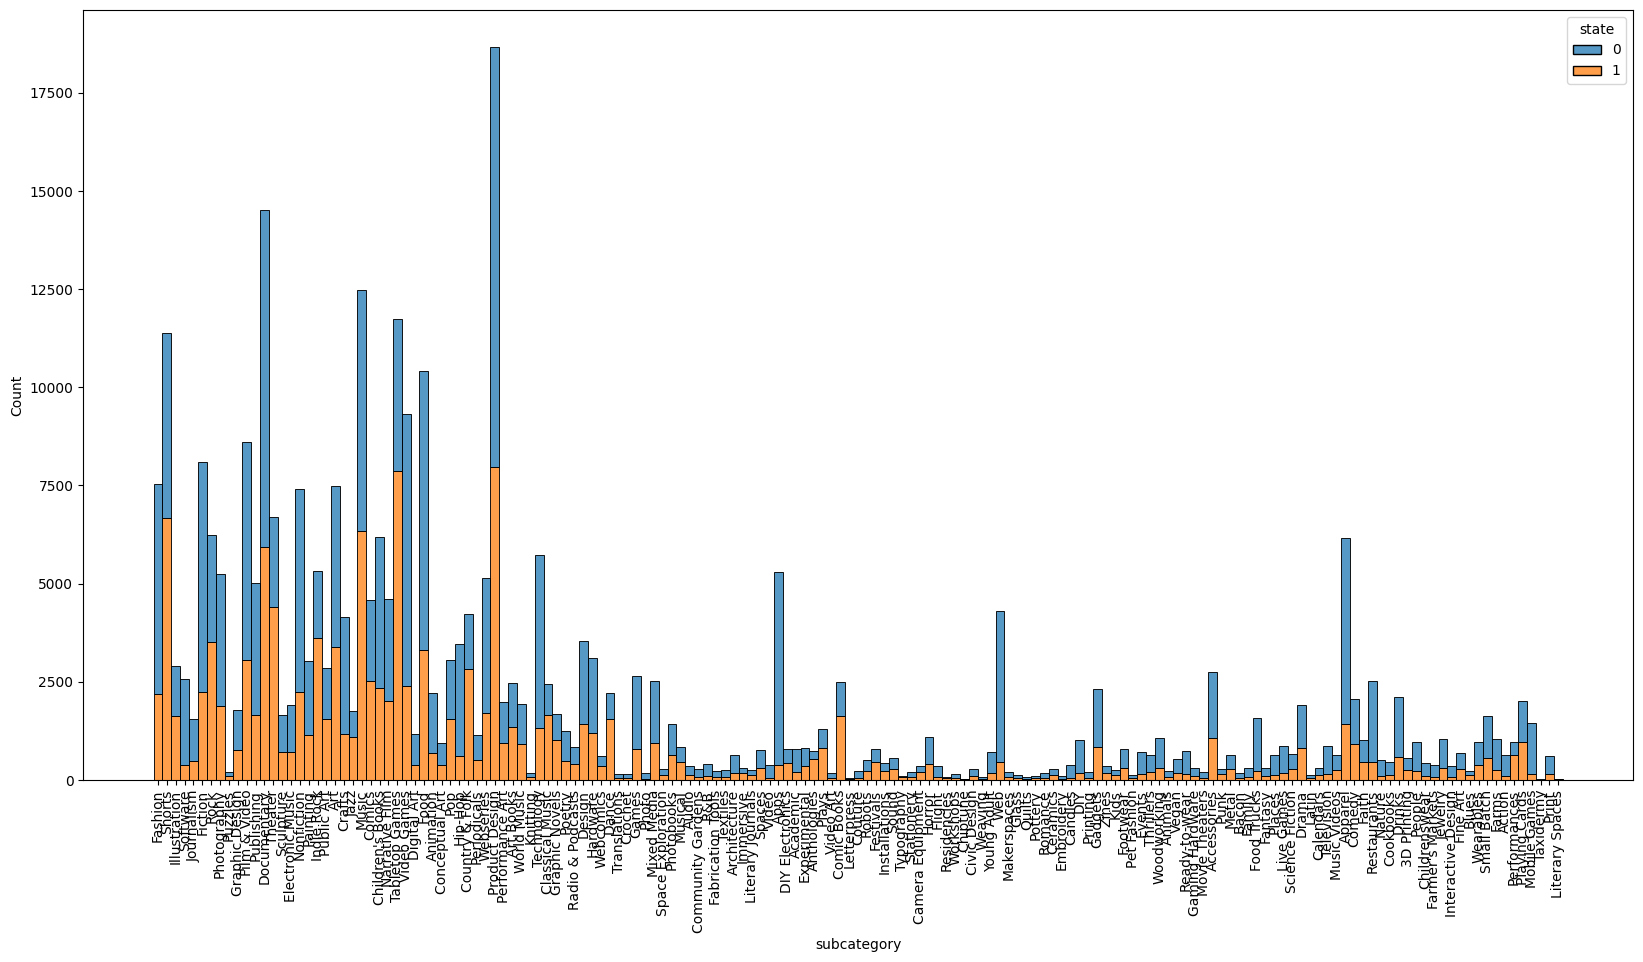

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
sns.histplot(x=df['category'], hue=df['state'], palette='tab10', multiple="stack")
plt.xticks(rotation=90)
plt.show()

sns.histplot(x=df['subcategory'], hue=df['state'], palette='tab10', multiple="stack")
plt.xticks(rotation=90)
plt.show()

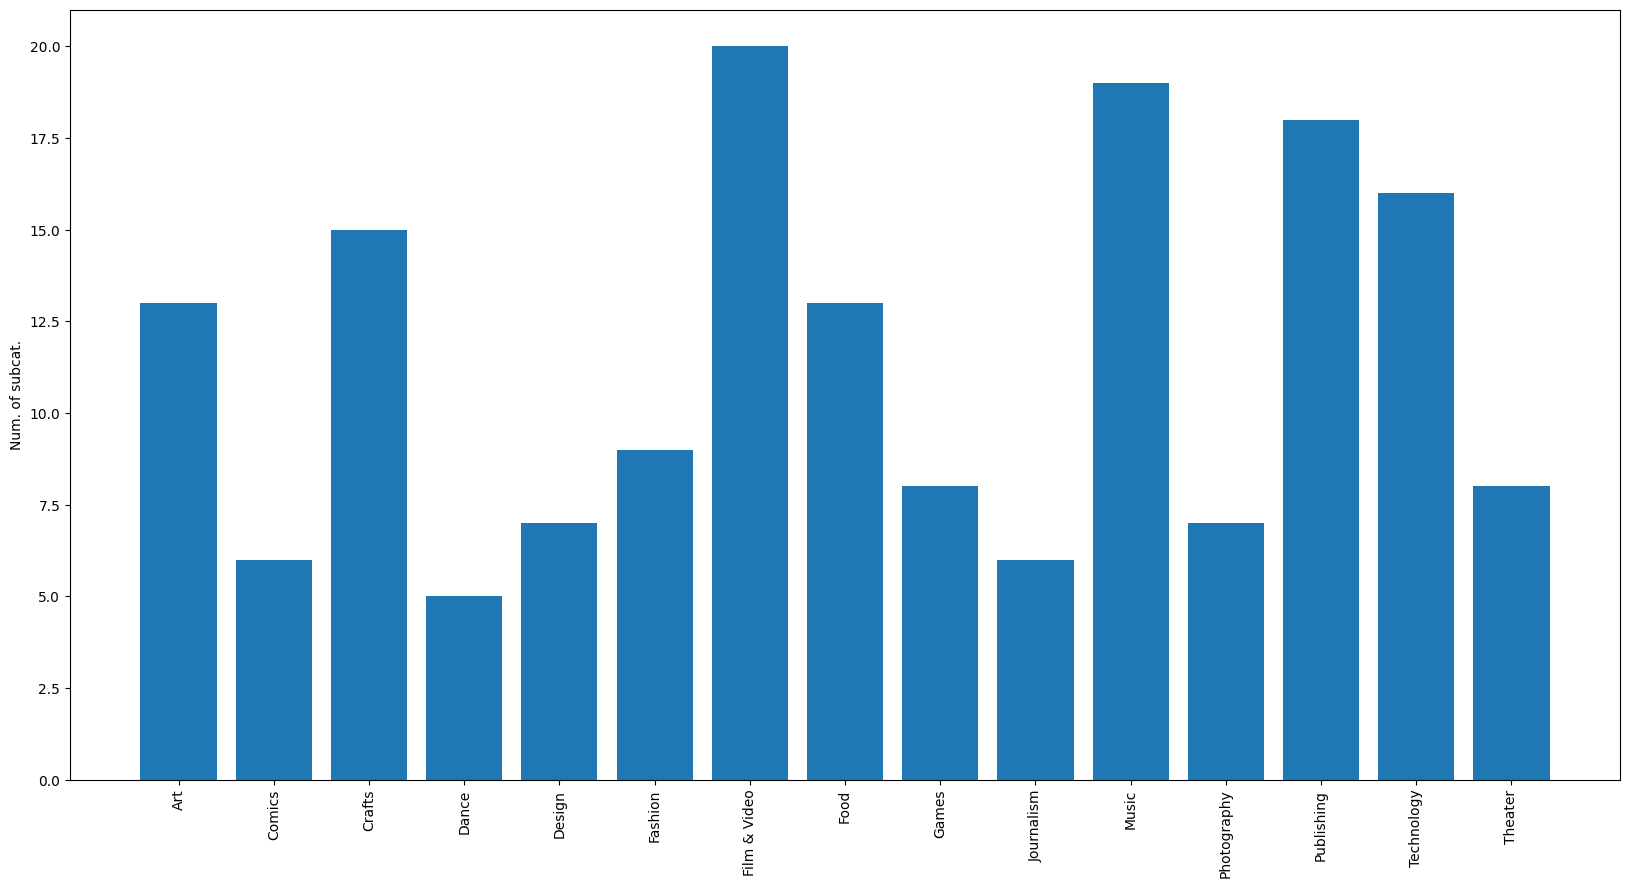

In [8]:
plt.bar(x=pd.DataFrame(df.groupby('category')['subcategory'].nunique()).index, height=pd.DataFrame(df.groupby('category')['subcategory'].nunique())['subcategory'])
plt.xticks(rotation=90)
plt.ylabel('Num. of subcat.')
plt.show()


In [9]:
cat_cols = [val for val in X_train.columns.tolist() if X_train[val].nunique() < 50]
X_train['duration_days'] = X_train.deadline - X_train.launched
X_train['duration_days'] = X_train['duration_days'].dt.days
#X_train['launched'] = X_train['launched'].astype('object')
#X_train['deadline'] = X_train['deadline'].astype('object')
X_train.info()
cat_cols

<class 'pandas.core.frame.DataFrame'>
Index: 232023 entries, 195990 to 138812
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   name           232023 non-null  object        
 1   category       232023 non-null  object        
 2   subcategory    232023 non-null  object        
 3   country        232023 non-null  object        
 4   launched       232023 non-null  datetime64[ns]
 5   deadline       232023 non-null  datetime64[ns]
 6   goal           232023 non-null  int64         
 7   pledged        232023 non-null  int64         
 8   backers        232023 non-null  int64         
 9   duration_days  232023 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 19.5+ MB


['category', 'country']

In [11]:
#df.groupby('category')['subcategory'].nunique()

#df.groupby('category')['subcategory'].unique()

pd.DataFrame(pd.crosstab(df['country'],df['state']))

state,0,1
country,,
Australia,4606,2010
Austria,378,107
Belgium,371,152
Canada,8236,4134
Denmark,566,360
France,1612,908
Germany,2499,937
Hong Kong,261,216
Ireland,476,207


**Base model training and results output**

In [ ]:
pass
#Training of example model:
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)

# The input for calling a model from command promt is "python /path_to/name_of_script_where_model_needed.py /path_to/model_name.sav /path_to/X_test.csv /path_to/y_test.csv"
#                                                             sys.arg[0]='/path_to/name_of_script_where_model_needed.py' 
#                                                             sys.arg[1]='/path_to/model_name.sav' 
#                                                             sys.arg[2]='/path_to/X_test.csv' 
#                                                             sys.arg[3]='/path_to/y_test.csv' 


# To save trained model:
pickle.dump(base_model, open('models/linear_regression_model.sav', 'wb'))

# Loading back the model:
loaded_model = pickle.load(open(sys.argv[1], 'rb'))

# Loading (test)data from files:
X_test = pd.read_csv(sys.argv[2])
y_test = pd.read_csv(sys.argv[3])

# Using loaded model to predict/for voting/to see stats/to use as input for another model/etc.:
base_predict = loaded_model.predict(X_test)
base_conf = confusion_matrix(y_test, base_predict)